# Sensor Data Fusion
Lecturer: Prof. Baum \
Tutor: Kolja Thormann \
Semester: Winter 21/22
## Homework 11
$\newcommand\vect[1]{\begin{bmatrix}#1\end{bmatrix}}$
$\newcommand\rvec[1]{\textbf{#1}}$
Assume the setting from the lecture. We have three classes $X=\{x_1,x_2,x_3\}$ and three possible measurements $Z=\{z_1,z_2,z_3\}$ with measurement sets

$\Sigma_{x_1}=\{z_1\}$

$\Sigma_{x_2}=\{z_1,z_2\}$

$\Sigma_{x_3}=\{z_1,z_2,z_3\}$


---
The following tasks will have missing sections marked that you should fill out. 

Missing code parts are marked by
```
# ... code code code
=== YOUR CODE HERE ===

=== END OF YOUR CODE ===
# ... code code code
```
If you are asked to implement a function, make sure to check what variable will be returned by the function and to fill it accordingly. Do not change code outside of the indicated sections.

Furthermore, some questions require theoretical answers instead of python code.

Such questions will have a field marked like this: 

=== YOUR ANSWER HERE === 

In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

---
### a) 
Implement a function to recursivly track the class probability given the standard approach.

In [2]:
def update(p_x, z, l_mat):
    """
    Implements the motion model.
    
    :param p_x: array of prior class probabilities
    :param z: ID of the measurement in the confusion matrix
    :param l_mat: confusion matrix containing the likelihoods
    :return: p_x, the array of posterior class probabilities
    """

    p_x = p_x * l_mat[z]
    p_x /= np.sum(p_x)
    
    return p_x

---
### b)
Use the function from a) to track the probabilities over $20$ time steps. Let $z^{(k)}$ be the measurement at time step $k$. Assume you receive measurements $z^{(7)}=z_2$, $z^{(13)}=z_3$, and $z^{(k)}=z_1$ for $k\in\{1,\dots,20\}\setminus\{7,13\}$. Plot the development of the class probabilities.

In [3]:
p_x = np.ones((21, 3)) / 3.0
m_set = np.zeros(20, int)
m_set[6] = 1
m_set[12] = 2

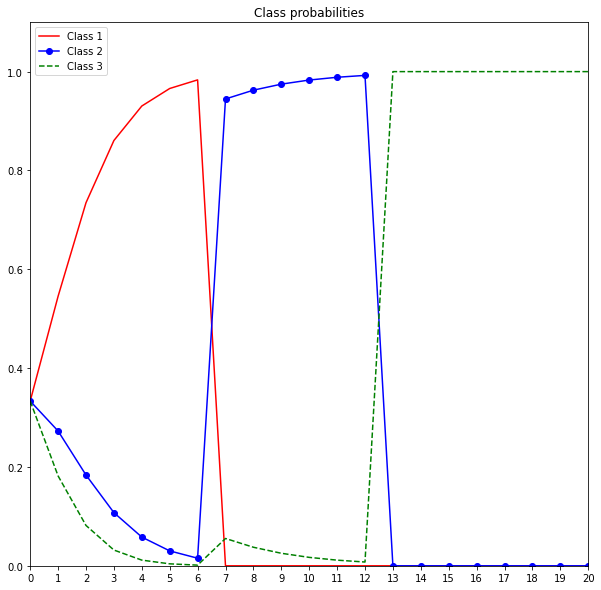

In [4]:
l_mat = np.array([
    [1.0, 0.5, 1.0/3.0],
    [0.0, 0.5, 1.0/3.0],
    [0.0, 0.0, 1.0/3.0],
])

for i in range(20):
    p_x[i+1] = update(p_x[i], m_set[i], l_mat)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(np.arange(0, 21), p_x[:, 0], "r", label="Class 1")
ax.plot(np.arange(0, 21), p_x[:, 1], "b-o", label="Class 2")
ax.plot(np.arange(0, 21), p_x[:, 2], "g--", label="Class 3")
plt.axis([0, 20, 0, 1.1])
ax.set_xticks(np.arange(0,21))
plt.title("Class probabilities")
plt.legend()
plt.show()

---
### e)
Now implement a function to recursivly track the class probabilities based on the random set approach, defining and using a generalized likelihood function. Use the same measurements as in b) to track the class probabilities. Visualize the results.

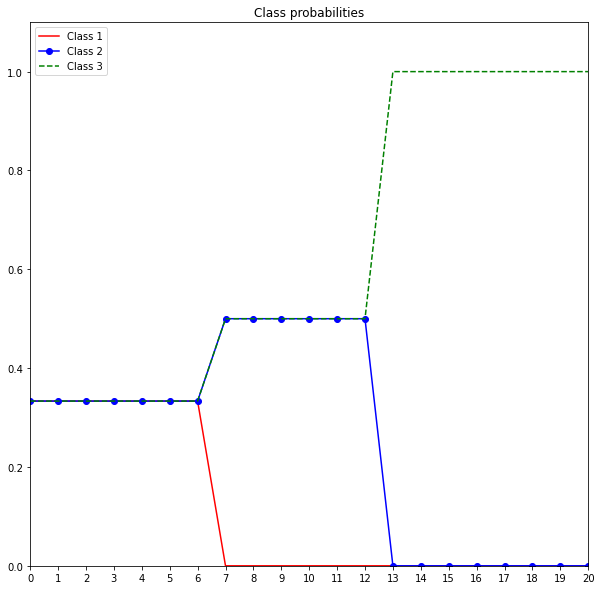

In [5]:
l_mat = np.array([
    [1.0, 1.0, 1.0],
    [0.0, 1.0, 1.0],
    [0.0, 0.0, 1.0],
])

for i in range(20):
    p_x[i+1] = update(p_x[i], m_set[i], l_mat)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(np.arange(0, 21), p_x[:, 0], "r", label="Class 1")
ax.plot(np.arange(0, 21), p_x[:, 1], "b-o", label="Class 2")
ax.plot(np.arange(0, 21), p_x[:, 2], "g--", label="Class 3")
plt.axis([0, 20, 0, 1.1])
ax.set_xticks(np.arange(0,21))
plt.title("Class probabilities")
plt.legend()
plt.show()